In [2]:
# Importing all libraries needed

import numpy as np
import pandas as pd
import datetime as dt
from scipy import stats
from scipy.stats import boxcox
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error



In [3]:
# Reading Dataset

r_d = pd.read_csv("H2HBABBA2990.csv")             
web = r_d

In [4]:
# Converting it into a Dataframe

r_d = pd.DataFrame(r_d)

In [5]:
# Finding all the sum of total numbers of missing values in a column

r_d.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    2
isOpen                        0
dtype: int64

In [5]:
# Total number of rows and columns 

r_d.shape

(50000, 19)

In [6]:
# As we can see in `Out[4]:` total number of columns and number of items missing in attribute 'area-business'
# are same so we can remove this attribute also there is an error that there are two attributes with same sementics
# ie. 'document_create_date' and 'document_create_date.1' which creates data redundancy so we can easily remove this.

del r_d['area_business']
del r_d['document_create_date.1']

# for shorter command you can use r_d = r_d.drop(['area_business','document_create_date.1'], axis = 1)

r_d = r_d.dropna(axis = 0, how ='any')

In [7]:
col_t = list(r_d.columns)
col_t

['business_code',
 'cust_number',
 'name_customer',
 'clear_date',
 'buisness_year',
 'doc_id',
 'posting_date',
 'document_create_date',
 'due_in_date',
 'invoice_currency',
 'document type',
 'posting_id',
 'total_open_amount',
 'baseline_create_date',
 'cust_payment_terms',
 'invoice_id',
 'isOpen']

In [8]:
#deleting all coloumns with one same value
for i in col_t:
    if(len(set(r_d[i]))==1):
        del r_d[i]

In [9]:
r_d

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
0,U001,0200759878,SA us,2020-02-19 00:00:00,2020.0,1.930475e+09,2020-02-04,20200204,20200219.0,USD,61782.75,20200204.0,NAH4,1.930475e+09
1,U001,0100021540,MASTER llc,2019-12-31 00:00:00,2019.0,1.930301e+09,2019-12-19,20191219,20191229.0,USD,5703.30,20191219.0,NA10,1.930301e+09
2,CA02,0140106408,WAL-M,2019-06-05 00:00:00,2019.0,2.960550e+09,2019-05-18,20190518,20190528.0,CAD,131131.68,20190518.0,CA10,2.960550e+09
4,U001,0200769623,WAL-MAR systems,2019-11-25 00:00:00,2019.0,1.930137e+09,2019-11-13,20191110,20191128.0,USD,65837.15,20191113.0,NAH4,1.930137e+09
6,U001,0200769623,WAL-MAR trust,2019-11-29 00:00:00,2019.0,1.930157e+09,2019-11-16,20191115,20191201.0,USD,25174.63,20191116.0,NAH4,1.930157e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,0200418007,AM corporation,2019-09-04 00:00:00,2019.0,1.929758e+09,2019-08-20,20190819,20190904.0,USD,56832.77,20190820.0,NAA8,1.929758e+09
49995,U001,0200741174,M B us,2019-07-12 00:00:00,2019.0,1.929524e+09,2019-06-26,20190621,20190711.0,USD,13517.58,20190626.0,NAA8,1.929524e+09
49996,U001,0100043892,IN-N llc,2019-09-12 00:00:00,2019.0,1.929803e+09,2019-08-28,20190828,20190912.0,USD,16985.57,20190828.0,NAA8,1.929803e+09
49997,U001,0200769623,WAL-MAR us,2019-03-22 00:00:00,2019.0,1.928948e+09,2019-03-11,20190312,20190326.0,USD,471.56,20190311.0,NAH4,1.928948e+09


In [10]:
def change_dt1(dtt):
    dtt = str(dtt)
    y = int(dtt[0:4])
    m = int(dtt[4:6])
    d = int(dtt[6:8])
    return dt.datetime(y,m,d)

def change_dt2(dtt):
    dtt = str(dtt)
    y = int(dtt[0:4])
    m = int(dtt[5:7])
    d = int(dtt[8:10])
    return dt.datetime(y,m,d)


In [11]:
#converting all dates into correct format
r_d['due_date'] = r_d['due_in_date'].apply(change_dt1)
del r_d['due_in_date']
r_d['clear_date'] = r_d['clear_date'].apply(change_dt2)
r_d['target'] = (r_d['clear_date'] - r_d['due_date']).dt.days
r_d['document_create_date'] = r_d['document_create_date'].apply(change_dt1)
r_d['document_create_date'] = r_d['document_create_date'].apply(change_dt2)
r_d['baseline_create_date'] = r_d['baseline_create_date'].apply(change_dt1)

In [12]:
r_d.sort_values(by=['posting_date'], inplace=True)
r_d

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,due_date,target
7080,U001,0200769623,WAL-MAR,2019-01-11,2019.0,1.928543e+09,2018-12-30,2018-12-30,USD,30027.03,2018-12-30,NAH4,1.928543e+09,2019-01-14,-3
34902,U001,0200726979,BJ'S llc,2019-01-15,2019.0,1.928538e+09,2018-12-30,2018-12-29,USD,240.86,2018-12-30,NAA8,1.928538e+09,2019-01-14,1
28944,U001,0200744019,TARG,2019-01-18,2019.0,1.928541e+09,2018-12-30,2018-12-30,USD,35694.56,2018-12-30,NAA8,1.928541e+09,2019-01-14,4
34901,U001,0200769623,WAL-MAR systems,2019-01-11,2019.0,1.928540e+09,2018-12-30,2018-12-29,USD,2268.45,2018-12-30,NAH4,1.928540e+09,2019-01-14,-3
21139,U001,0200769623,WAL-MAR co,2019-01-15,2019.0,1.928542e+09,2018-12-30,2018-12-29,USD,65940.47,2018-12-30,NAH4,1.928542e+09,2019-01-14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,CA02,0140106408,WAL-M trust,2020-03-17,2020.0,2.960618e+09,2020-02-27,2020-02-27,CAD,129653.95,2020-02-27,CA10,2.960618e+09,2020-03-08,9
34168,U001,0200571849,US associates,2020-03-20,2020.0,1.930580e+09,2020-02-27,2020-02-27,USD,4230.72,2020-02-27,NAD1,1.930580e+09,2020-03-18,2
39327,CA02,0140106408,WAL-M systems,2020-03-16,2020.0,2.960614e+09,2020-02-27,2020-02-28,CAD,57674.24,2020-02-29,CA10,2.960614e+09,2020-03-10,6
42654,U001,0200794332,COST foundation,2020-03-12,2020.0,1.930574e+09,2020-02-27,2020-02-26,USD,16997.76,2020-02-27,NAAX,1.930574e+09,2020-03-13,-1


In [13]:
# for datasplitting into x and y

pd.to_datetime(r_d['document_create_date']).min()

Timestamp('2018-12-28 00:00:00')

In [14]:
pd.to_datetime(r_d['document_create_date']).max()

Timestamp('2020-02-28 00:00:00')

In [15]:
# now we split our dataset into 70-30 split
print(12*0.3)

3.5999999999999996


In [16]:
x = r_d[r_d['document_create_date'] <= '2020-01-01'].copy()
y =  r_d[r_d['document_create_date'] > '2020-01-01'].copy()

In [17]:
# adding more attributes

x['year'] = x['document_create_date'].dt.year
x['month'] = x['document_create_date'].dt.month
x['day'] = x['document_create_date'].dt.day
x['week'] = x['document_create_date'].dt.week
x['which_day'] = x['document_create_date'].dt.dayofweek
x['quarter'] = x['document_create_date'].dt.quarter


y['year'] = y['document_create_date'].dt.year
y['month'] = y['document_create_date'].dt.month
y['day'] = y['document_create_date'].dt.day
y['week'] = y['document_create_date'].dt.week
y['which_day'] = y['document_create_date'].dt.dayofweek
y['quarter'] = y['document_create_date'].dt.quarter

<ipython-input-17-144c95c2a4f4>:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  x['week'] = x['document_create_date'].dt.week
<ipython-input-17-144c95c2a4f4>:14: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  y['week'] = y['document_create_date'].dt.week


In [18]:
#Analysing type of values into attributes

print(dict(x['invoice_currency'].value_counts()))
print(dict(y['invoice_currency'].value_counts()))

print(dict(x['business_code'].value_counts()))
print(dict(y['business_code'].value_counts()))

print(dict(x['cust_payment_terms'].value_counts()))
print(dict(y['cust_payment_terms'].value_counts()))

{'USD': 32056, 'CAD': 2933}
{'USD': 4649, 'CAD': 360}
{'U001': 31459, 'CA02': 2932, 'U013': 480, 'U002': 100, 'U005': 14, 'U007': 4}
{'U001': 4563, 'CA02': 360, 'U013': 73, 'U002': 12, 'U005': 1}
{'NAA8': 13865, 'NAH4': 9300, 'CA10': 2849, 'NAC6': 1240, 'NAM4': 952, 'NAAX': 850, 'NAD1': 677, 'NAU5': 652, 'NAG2': 631, 'NA32': 559, 'NAGD': 483, 'NAX2': 480, 'NAM2': 375, 'NA10': 288, 'NAD5': 238, 'NAVF': 208, 'NAM1': 200, 'NAVE': 197, 'NAAW': 149, 'NAWU': 110, 'NAWN': 83, 'NAVR': 81, 'NAVQ': 78, 'NAWP': 66, 'NAUZ': 50, 'CA30': 38, 'NABG': 30, 'NA3B': 28, 'NAVM': 26, 'NA38': 20, 'NAD4': 17, 'NA3F': 16, 'C106': 16, 'NAVL': 14, 'NA84': 13, 'NACB': 13, 'NA8Q': 10, 'NAVD': 9, 'NAB1': 9, 'NA9X': 8, 'BR56': 7, 'NA25': 6, 'NAM3': 5, 'NATX': 4, 'NATH': 4, 'NAUP': 4, 'NAD8': 3, 'CAB1': 3, 'CAX2': 2, 'NAWM': 2, 'BR12': 2, 'NATM': 2, 'NATK': 2, 'CA60': 2, 'NATL': 2, '90M7': 2, 'NATV': 2, 'NAV2': 1, 'NAUI': 1, 'NAUY': 1, 'NA31': 1, 'BR60': 1, 'NATW': 1, 'NAUW': 1}
{'NAA8': 1879, 'NAH4': 1398, 'CA10': 

In [19]:
#Analysing Trends and Graphs
x.shape

(34989, 21)

<AxesSubplot:xlabel='business_code', ylabel='target'>

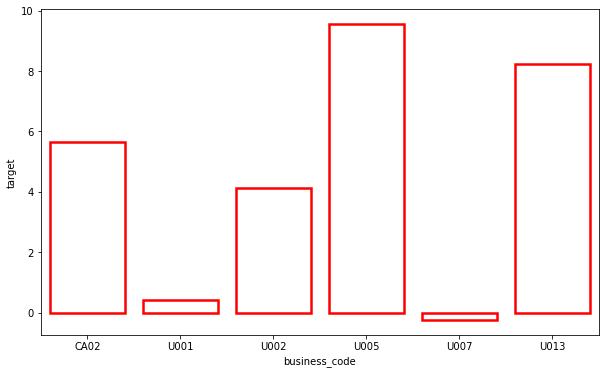

In [20]:
temp = pd.DataFrame(x.groupby(['business_code'], axis=0, as_index=False)['target'].mean())
plt.figure(figsize=(10,6))
sns.barplot(x="business_code", y="target",data=temp,linewidth=2.5, facecolor=(1, 1, 1, 0), errcolor=".4", edgecolor="red")

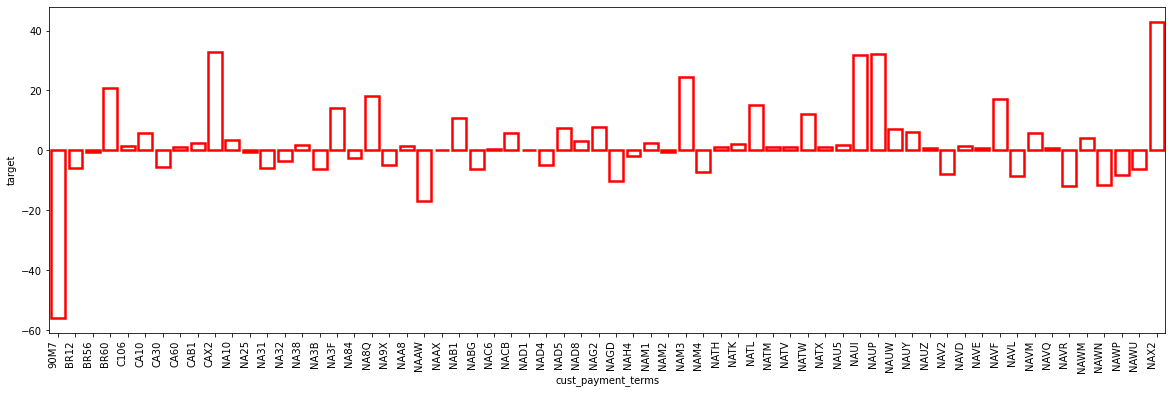

In [21]:
temp = pd.DataFrame(x.groupby(['cust_payment_terms'], axis=0, as_index=False)['target'].mean())
plt.figure(figsize=(20,6))
graph = sns.barplot(x="cust_payment_terms", y="target",data=temp,linewidth=2.5, facecolor=(1, 1, 1, 0),errcolor=".4", edgecolor="red")
graph = graph.set_xticklabels(graph.get_xticklabels(), rotation=90, horizontalalignment='right')

/Users/ilovemarijuana/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ilovemarijuana/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_open_amount', ylabel='Density'>

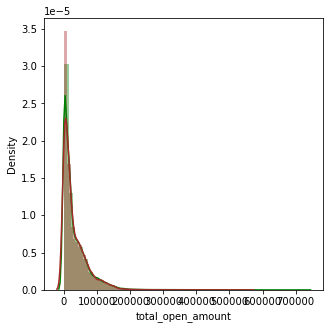

In [22]:
plt.figure(figsize=(5,5))
plt.figure(1)
sns.distplot(x['total_open_amount'],color='green')
sns.distplot(y['total_open_amount'],color='brown')

In [23]:
#as above graph is skewed so we use transform
x['total_open_amount'] = np.log(x['total_open_amount'])
y['total_open_amount'] = np.log(y['total_open_amount'])

/Users/ilovemarijuana/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='target', ylabel='Density'>

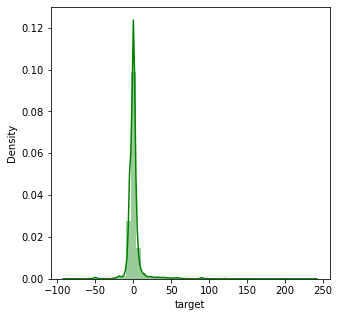

In [24]:
plt.figure(figsize=(5,5))
plt.figure(1)
sns.distplot(x['target'],color='green')

In [25]:
#mapping categorical variables
"""for i in range(x.shape[0]):
    if x.iloc[i,8]=="USD":
        x.iloc[i,8] = 1
    elif x.iloc[i,8]=="CAD":
        x.iloc[i,8] = 0
"""

x['invoice_currency'] = x['invoice_currency'].map({'USD':1,'CAD':0})
y['invoice_currency'] = y['invoice_currency'].map({'USD':1,'CAD':0})

In [26]:
x['cust_number'].nunique()

1276

In [27]:
x['invoice_id'].nunique()

34224

In [28]:
x.shape

(34989, 21)

In [29]:
print(34224/34989)

0.9781359855954729


In [30]:
# as all invoice-id is unique so we can drop
del x['invoice_id']
del y['invoice_id']

In [31]:
x

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,due_date,target,year,month,day,week,which_day,quarter
7080,U001,0200769623,WAL-MAR,2019-01-11,2019.0,1.928543e+09,2018-12-30,2018-12-30,1,10.309853,2018-12-30,NAH4,2019-01-14,-3,2018,12,30,52,6,4
34902,U001,0200726979,BJ'S llc,2019-01-15,2019.0,1.928538e+09,2018-12-30,2018-12-29,1,5.484216,2018-12-30,NAA8,2019-01-14,1,2018,12,29,52,5,4
28944,U001,0200744019,TARG,2019-01-18,2019.0,1.928541e+09,2018-12-30,2018-12-30,1,10.482754,2018-12-30,NAA8,2019-01-14,4,2018,12,30,52,6,4
34901,U001,0200769623,WAL-MAR systems,2019-01-11,2019.0,1.928540e+09,2018-12-30,2018-12-29,1,7.726852,2018-12-30,NAH4,2019-01-14,-3,2018,12,29,52,5,4
21139,U001,0200769623,WAL-MAR co,2019-01-15,2019.0,1.928542e+09,2018-12-30,2018-12-29,1,11.096508,2018-12-30,NAH4,2019-01-14,1,2018,12,29,52,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45228,U001,0200769623,WAL-MAR,2020-01-14,2020.0,1.930341e+09,2020-01-04,2020-01-01,1,11.133989,2020-01-04,NAH4,2020-01-19,-5,2020,1,1,1,2,1
33276,U001,CCU013,KRAFT F systems,2020-02-28,2020.0,1.930339e+09,2020-01-04,2019-12-31,1,8.032974,2020-01-04,NAX2,2020-01-04,55,2019,12,31,1,1,4
42497,U001,200705089,JETR in,2020-01-17,2020.0,1.930338e+09,2020-01-04,2019-12-31,1,8.597176,2020-01-04,NAA8,2020-01-19,-2,2019,12,31,1,1,4
20272,U001,0200760666,KEHE trust,2020-01-24,2020.0,1.930341e+09,2020-01-05,2019-12-31,1,10.340482,2020-01-05,NAA8,2020-01-20,4,2019,12,31,1,1,4


In [32]:
# as U002, U005, U007 is scanty so we replace it with other
x = x.replace(['U002', 'U005', 'U007'], 'other')
y = y.replace(['U002', 'U005', 'U007'], 'other')


In [33]:
x = pd.concat([x,pd.get_dummies(x['business_code']) ], axis=1)
y = pd.concat([y, pd.get_dummies(y['business_code'])], axis=1)
del x['business_code']

In [34]:
x

,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,invoice_currency,total_open_amount,baseline_create_date,...,year,month,day,week,which_day,quarter,CA02,U001,U013,other
7080,0200769623,WAL-MAR,2019-01-11,2019.0,1.928543e+09,2018-12-30,2018-12-30,1,10.309853,2018-12-30,...,2018,12,30,52,6,4,0,1,0,0
34902,0200726979,BJ'S llc,2019-01-15,2019.0,1.928538e+09,2018-12-30,2018-12-29,1,5.484216,2018-12-30,...,2018,12,29,52,5,4,0,1,0,0
28944,0200744019,TARG,2019-01-18,2019.0,1.928541e+09,2018-12-30,2018-12-30,1,10.482754,2018-12-30,...,2018,12,30,52,6,4,0,1,0,0
34901,0200769623,WAL-MAR systems,2019-01-11,2019.0,1.928540e+09,2018-12-30,2018-12-29,1,7.726852,2018-12-30,...,2018,12,29,52,5,4,0,1,0,0
21139,0200769623,WAL-MAR co,2019-01-15,2019.0,1.928542e+09,2018-12-30,2018-12-29,1,11.096508,2018-12-30,...,2018,12,29,52,5,4,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45228,0200769623,WAL-MAR,2020-01-14,2020.0,1.930341e+09,2020-01-04,2020-01-01,1,11.133989,2020-01-04,...,2020,1,1,1,2,1,0,1,0,0
33276,CCU013,KRAFT F systems,2020-02-28,2020.0,1.930339e+09,2020-01-04,2019-12-31,1,8.032974,2020-01-04,...,2019,12,31,1,1,4,0,1,0,0
42497,200705089,JETR in,2020-01-17,2020.0,1.930338e+09,2020-01-04,2019-12-31,1,8.597176,2020-01-04,...,2019,12,31,1,1,4,0,1,0,0
20272,0200760666,KEHE trust,2020-01-24,2020.0,1.930341e+09,2020-01-05,2019-12-31,1,10.340482,2020-01-05,...,2019,12,31,1,1,4,0,1,0,0


In [35]:
def skew_ck(dataset):
    col_t = dataset.columns
    for i in range(col_t.shape[0]):
        try:
            print(dataset[col_t[i]].skew())
        except:
            pass

In [36]:
def mptr(dataset,attribute):
    r = dict(dataset[attribute].value_counts())
    dataset[attribute+"_new"] = dataset[attribute].map(r)
    return dataset

In [37]:
#mapping to dictionary 
x = mptr(x,'cust_number')
y = mptr(y,'cust_number')
x = mptr(x,'cust_payment_terms')
y = mptr(y,'cust_payment_terms')
del x['cust_number']
del y['cust_payment_terms']
del x['cust_payment_terms']
del y['cust_number']

In [38]:
x.head(1)

,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,invoice_currency,total_open_amount,baseline_create_date,due_date,...,day,week,which_day,quarter,CA02,U001,U013,other,cust_number_new,cust_payment_terms_new
7080,WAL-MAR,2019-01-11,2019.0,1.928543e+09,2018-12-30,2018-12-30,1,10.309853,2018-12-30,2019-01-14,...,30,52,6,4,0,1,0,0,7821,9300


/Users/ilovemarijuana/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cust_number_new', ylabel='Density'>

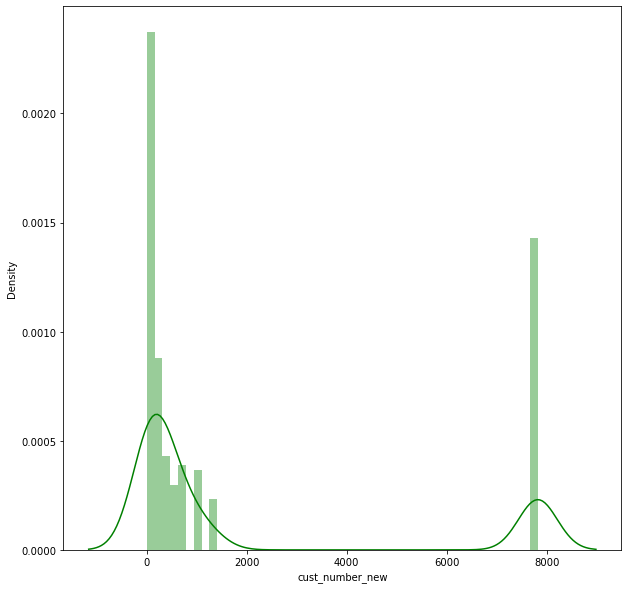

In [39]:
#analysing all the skewed variables and fixing them using boxcox
plt.figure(figsize=(10,10))
plt.figure(1)
sns.distplot(x['cust_number_new'],color='green')

/Users/ilovemarijuana/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cust_payment_terms_new', ylabel='Density'>

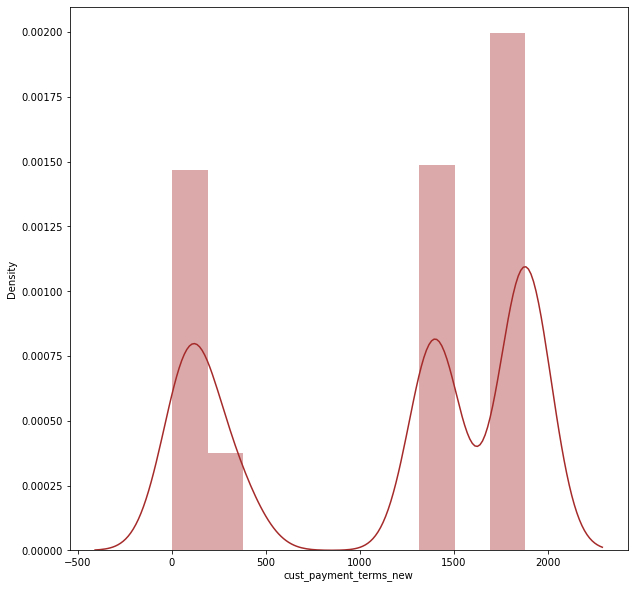

In [40]:
plt.figure(figsize=(10,10))
plt.figure(1)
sns.distplot(y['cust_payment_terms_new'],color='brown')

In [41]:
# all attributes skewed values
skew_ck(x)

11.294893851760907
3.0002593023042063
-3.0036133995038203
-0.9424365997379618
4.344413885609327
-10.931957895821705
0.024441122758222026
0.0338946743188886
0.02515576489373121
0.23474577589213272
0.043605564578143734
3.004285014685946
-2.650416922131846
8.361438503075075
17.1331696357291
1.2924122118458286
-0.40294580299659666


In [42]:
x

,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,invoice_currency,total_open_amount,baseline_create_date,due_date,...,day,week,which_day,quarter,CA02,U001,U013,other,cust_number_new,cust_payment_terms_new
7080,WAL-MAR,2019-01-11,2019.0,1.928543e+09,2018-12-30,2018-12-30,1,10.309853,2018-12-30,2019-01-14,...,30,52,6,4,0,1,0,0,7821,9300
34902,BJ'S llc,2019-01-15,2019.0,1.928538e+09,2018-12-30,2018-12-29,1,5.484216,2018-12-30,2019-01-14,...,29,52,5,4,0,1,0,0,1273,13865
28944,TARG,2019-01-18,2019.0,1.928541e+09,2018-12-30,2018-12-30,1,10.482754,2018-12-30,2019-01-14,...,30,52,6,4,0,1,0,0,714,13865
34901,WAL-MAR systems,2019-01-11,2019.0,1.928540e+09,2018-12-30,2018-12-29,1,7.726852,2018-12-30,2019-01-14,...,29,52,5,4,0,1,0,0,7821,9300
21139,WAL-MAR co,2019-01-15,2019.0,1.928542e+09,2018-12-30,2018-12-29,1,11.096508,2018-12-30,2019-01-14,...,29,52,5,4,0,1,0,0,7821,9300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45228,WAL-MAR,2020-01-14,2020.0,1.930341e+09,2020-01-04,2020-01-01,1,11.133989,2020-01-04,2020-01-19,...,1,1,2,1,0,1,0,0,7821,9300
33276,KRAFT F systems,2020-02-28,2020.0,1.930339e+09,2020-01-04,2019-12-31,1,8.032974,2020-01-04,2020-01-04,...,31,1,1,4,0,1,0,0,474,480
42497,JETR in,2020-01-17,2020.0,1.930338e+09,2020-01-04,2019-12-31,1,8.597176,2020-01-04,2020-01-19,...,31,1,1,4,0,1,0,0,7,13865
20272,KEHE trust,2020-01-24,2020.0,1.930341e+09,2020-01-05,2019-12-31,1,10.340482,2020-01-05,2020-01-20,...,31,1,1,4,0,1,0,0,18,13865


/Users/ilovemarijuana/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

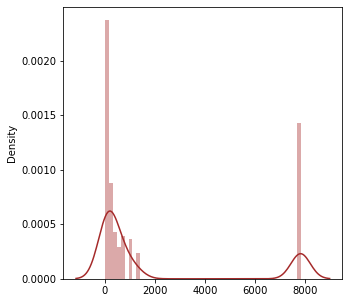

In [43]:
t = boxcox(x['cust_number_new'], 1.0)
plt.figure(figsize=(5,5))
plt.figure(1)
sns.distplot(t,color='brown')

In [44]:
x['cust_number_new'] = t

/Users/ilovemarijuana/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

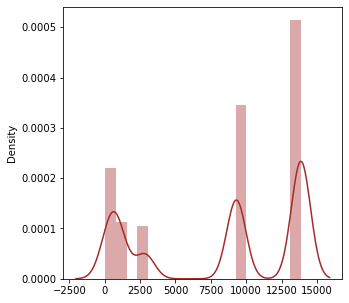

In [45]:
t = boxcox(x['cust_payment_terms_new'], 1.0)
plt.figure(figsize=(5,5))
plt.figure(1)
sns.distplot(t,color='brown')

In [46]:
x['cust_payment_terms_new'] = t

In [47]:
t = boxcox(y['cust_number_new'], 0.0)
y['cust_number_new'] = t

t = boxcox(y['cust_payment_terms_new'], 0.0)
y['cust_payment_terms_new'] = t

In [48]:
x

,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,invoice_currency,total_open_amount,baseline_create_date,due_date,...,day,week,which_day,quarter,CA02,U001,U013,other,cust_number_new,cust_payment_terms_new
7080,WAL-MAR,2019-01-11,2019.0,1.928543e+09,2018-12-30,2018-12-30,1,10.309853,2018-12-30,2019-01-14,...,30,52,6,4,0,1,0,0,7820.0,9299.0
34902,BJ'S llc,2019-01-15,2019.0,1.928538e+09,2018-12-30,2018-12-29,1,5.484216,2018-12-30,2019-01-14,...,29,52,5,4,0,1,0,0,1272.0,13864.0
28944,TARG,2019-01-18,2019.0,1.928541e+09,2018-12-30,2018-12-30,1,10.482754,2018-12-30,2019-01-14,...,30,52,6,4,0,1,0,0,713.0,13864.0
34901,WAL-MAR systems,2019-01-11,2019.0,1.928540e+09,2018-12-30,2018-12-29,1,7.726852,2018-12-30,2019-01-14,...,29,52,5,4,0,1,0,0,7820.0,9299.0
21139,WAL-MAR co,2019-01-15,2019.0,1.928542e+09,2018-12-30,2018-12-29,1,11.096508,2018-12-30,2019-01-14,...,29,52,5,4,0,1,0,0,7820.0,9299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45228,WAL-MAR,2020-01-14,2020.0,1.930341e+09,2020-01-04,2020-01-01,1,11.133989,2020-01-04,2020-01-19,...,1,1,2,1,0,1,0,0,7820.0,9299.0
33276,KRAFT F systems,2020-02-28,2020.0,1.930339e+09,2020-01-04,2019-12-31,1,8.032974,2020-01-04,2020-01-04,...,31,1,1,4,0,1,0,0,473.0,479.0
42497,JETR in,2020-01-17,2020.0,1.930338e+09,2020-01-04,2019-12-31,1,8.597176,2020-01-04,2020-01-19,...,31,1,1,4,0,1,0,0,6.0,13864.0
20272,KEHE trust,2020-01-24,2020.0,1.930341e+09,2020-01-05,2019-12-31,1,10.340482,2020-01-05,2020-01-20,...,31,1,1,4,0,1,0,0,17.0,13864.0


In [49]:
skew_ck(x)


11.294893851760907
3.0002593023042063
-3.0036133995038203
-0.9424365997379618
4.344413885609327
-10.931957895821705
0.024441122758222026
0.0338946743188886
0.02515576489373121
0.23474577589213272
0.043605564578143734
3.004285014685946
-2.650416922131846
8.361438503075075
17.1331696357291
1.2924122118458286
-0.40294580299659727


<AxesSubplot:>

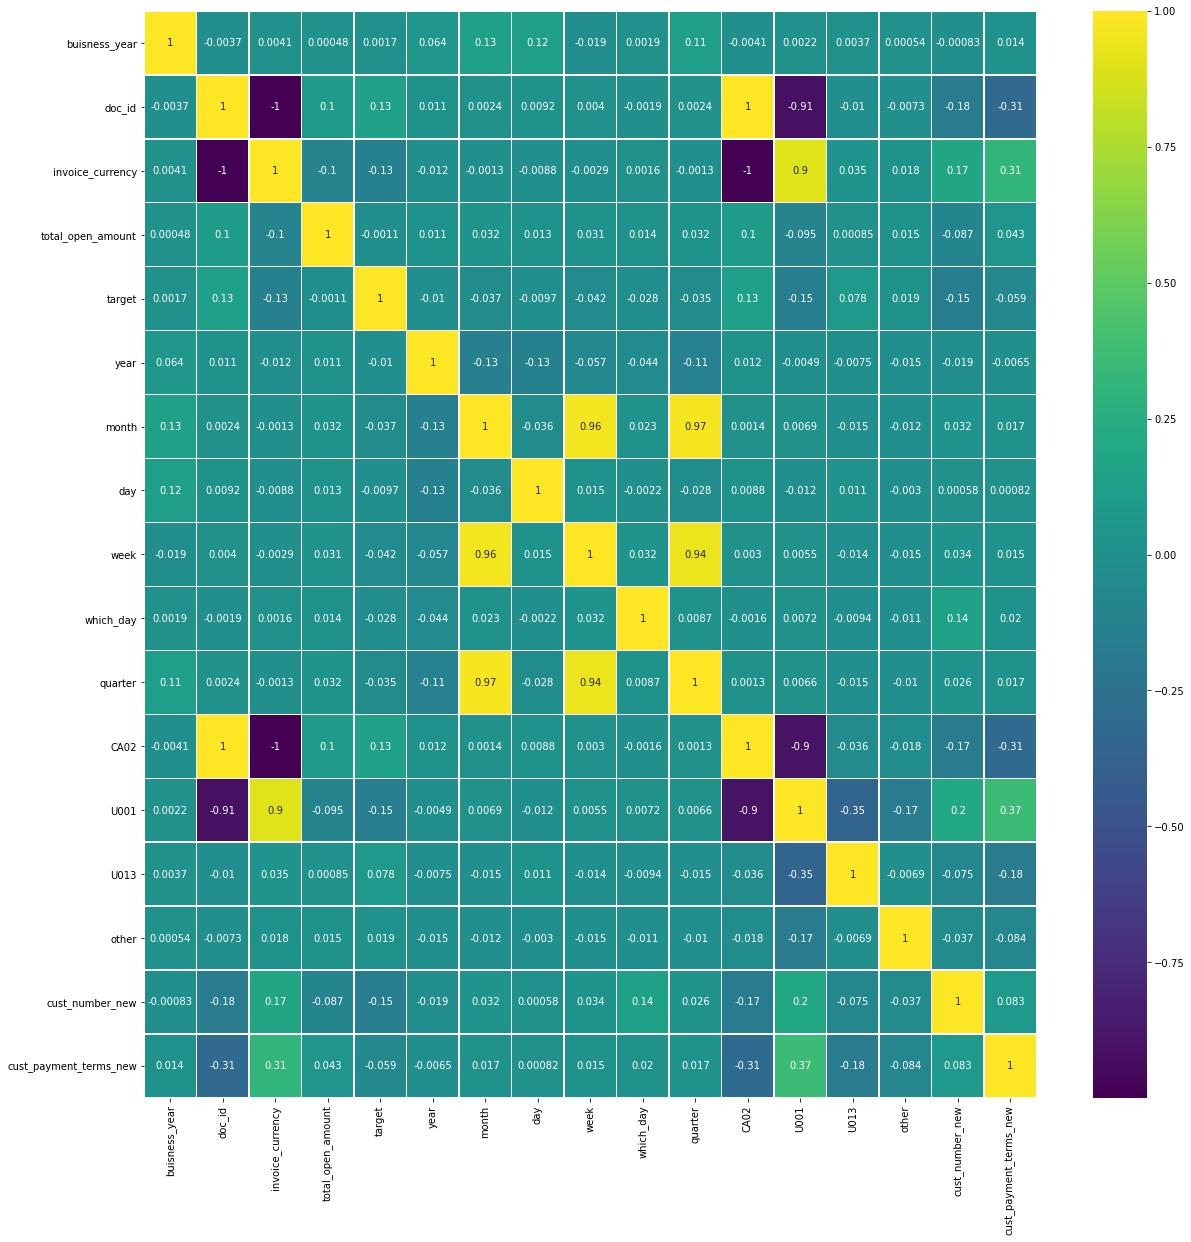

In [50]:
#Plotting correlation matrix and removing highly correlated terms
plt.figure(figsize=(20,20))
sns.heatmap(x.corr(),annot=True,cmap='viridis',linewidths=.5)

In [51]:
#only removing highly coreelated terms
x = x.drop(['doc_id','CA02','U001','week'], axis = 1)
y = y.drop(['doc_id','CA02','U001','week'], axis = 1)

<AxesSubplot:>

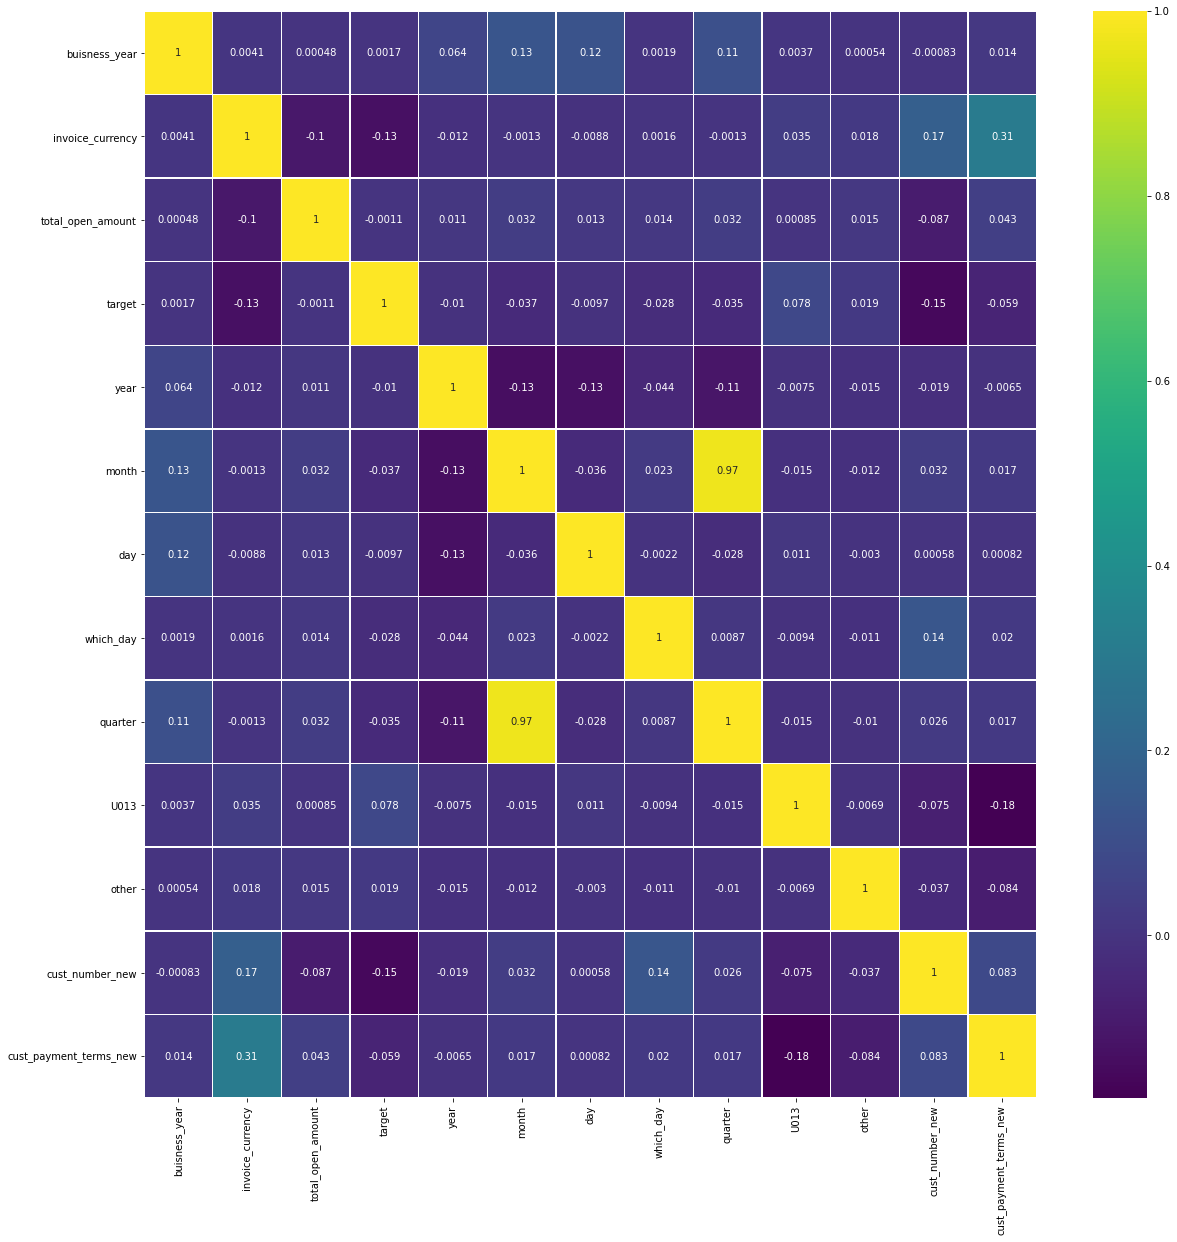

In [52]:
plt.figure(figsize=(20,20))
sns.heatmap(x.corr(),annot=True,cmap='viridis',linewidths=.5)

In [53]:
x

,name_customer,clear_date,buisness_year,posting_date,document_create_date,invoice_currency,total_open_amount,baseline_create_date,due_date,target,year,month,day,which_day,quarter,U013,other,cust_number_new,cust_payment_terms_new
7080,WAL-MAR,2019-01-11,2019.0,2018-12-30,2018-12-30,1,10.309853,2018-12-30,2019-01-14,-3,2018,12,30,6,4,0,0,7820.0,9299.0
34902,BJ'S llc,2019-01-15,2019.0,2018-12-30,2018-12-29,1,5.484216,2018-12-30,2019-01-14,1,2018,12,29,5,4,0,0,1272.0,13864.0
28944,TARG,2019-01-18,2019.0,2018-12-30,2018-12-30,1,10.482754,2018-12-30,2019-01-14,4,2018,12,30,6,4,0,0,713.0,13864.0
34901,WAL-MAR systems,2019-01-11,2019.0,2018-12-30,2018-12-29,1,7.726852,2018-12-30,2019-01-14,-3,2018,12,29,5,4,0,0,7820.0,9299.0
21139,WAL-MAR co,2019-01-15,2019.0,2018-12-30,2018-12-29,1,11.096508,2018-12-30,2019-01-14,1,2018,12,29,5,4,0,0,7820.0,9299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45228,WAL-MAR,2020-01-14,2020.0,2020-01-04,2020-01-01,1,11.133989,2020-01-04,2020-01-19,-5,2020,1,1,2,1,0,0,7820.0,9299.0
33276,KRAFT F systems,2020-02-28,2020.0,2020-01-04,2019-12-31,1,8.032974,2020-01-04,2020-01-04,55,2019,12,31,1,4,0,0,473.0,479.0
42497,JETR in,2020-01-17,2020.0,2020-01-04,2019-12-31,1,8.597176,2020-01-04,2020-01-19,-2,2019,12,31,1,4,0,0,6.0,13864.0
20272,KEHE trust,2020-01-24,2020.0,2020-01-05,2019-12-31,1,10.340482,2020-01-05,2020-01-20,4,2019,12,31,1,4,0,0,17.0,13864.0


In [54]:
#dropping uneccessary variables to clean data set which do not contributes in prediction
x.drop(['name_customer','clear_date','posting_date','document_create_date','baseline_create_date','due_date',],axis = 1,inplace = True)

In [55]:
y.drop(['business_code','name_customer','clear_date','posting_date','document_create_date','baseline_create_date','due_date',],axis = 1,inplace = True)

In [56]:
y_train = x['target']
x_train = x.drop(['target'],axis = 1)
y_test = y['target']
x_test = y.drop(['target'],axis=1)
print(x_train.shape)
print(y_train.shape)


(34989, 12)
(34989,)


In [57]:
# Training model

In [58]:
random_model = RandomForestRegressor(n_estimators=500, random_state = 42)


In [59]:
#Fit
random_model.fit(x_train, y_train)

y_pred = random_model.predict(x_test)

#Checking the accuracy
random_model_accuracy = round(random_model.score(x_train, y_train)*100,2)
print(round(random_model_accuracy, 2), '%')

92.18 %


In [60]:
random_model_accuracy1 = round(random_model.score(x_test,y_test)*100,2)
print(abs(round(random_model_accuracy1, 2)), '%')


68.8 %


In [61]:
mean_squared_error(y_test, y_pred, squared=False)

13.140755084228205

In [ ]:
x_2 =  